In [2]:
import numpy as np
from parse import parse

In [112]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2024, day=14)

def parses(data):
    return data.strip().split('\n')

import re
def parses(data):
    return [[int(i) for i in re.findall("-?\d+", line)] 
            for line in data.strip().split('\n')]

In [113]:
import math
import numpy as np
from collections import Counter
import re

def parses(data):
    nums = [[int(i) for i in re.findall("-?\d+", line)] 
            for line in data.strip().split('\n')]
    nums = np.array(nums)
    return nums[:, :2], nums[:, 2:]

def solve_a(data, W=101, H=103):
    mod = np.array([W, H])
    pos, vel = data
    for _ in range(100):
        pos = (pos + vel) % mod
    w, h = W//2, H//2
    pos = pos[pos[:, 0] != w]
    pos = pos[pos[:, 1] != h]
    quads = Counter([(x//(w+1), y//(h+1)) for x, y in pos])
    return math.prod(quads.values())

def solve_b(data, plot=False):
    mod = np.array([101, 103])
    pos, vel = data

    when, best, best_pos = 0, float('inf'), []
    for n in range(1,10_000):
        pos = (pos + vel) % mod
        # heuristic for how spread out the points are
        std = pos.std(axis=0).sum() 
        if std < best:
            best, when = std, n
            best_pos = pos.copy()
    if plot:
        X = np.zeros(mod)
        for x, y in best_pos:
            X[x, y] = 1
        import matplotlib.pyplot as plt
        plt.imshow(X.T)
        plt.show()

    return when

In [115]:
pos, vel = parses(puzzle.input_data)

### Chinese Remainder Theorem

In [117]:
Nx, Ny = 101, 103
mod = np.array([Nx, Ny])
pos, vel = parses(puzzle.input_data)

px,

In [140]:
px, py = pos.T
vx, vy = vel.T



In [145]:
px.shape

(500,)

In [148]:
sx = ((px[...,None]+np.arange(Nx)*vx[...,None]) % Nx).std(axis=0)
sy = ((py[...,None]+np.arange(Ny)*vy[...,None]) % Ny).std(axis=0)

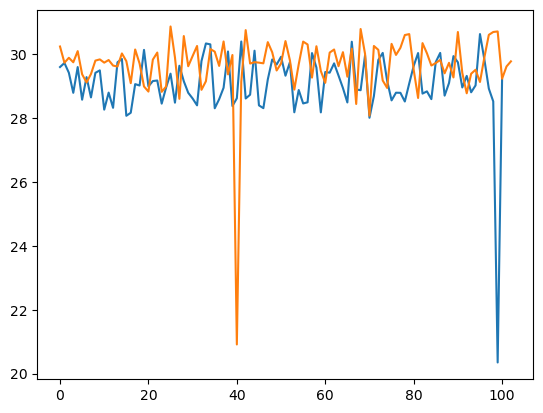

In [151]:
plt.plot(sx)
plt.plot(sy)

In [152]:
bx = np.argmin(sx)
by = np.argmin(sy)

In [153]:
from sympy.ntheory.modular import crt

In [154]:
b, _ = crt([Nx,Ny],[bx,by])

(8280, 10403)

In [131]:
sx = ((pos[...,0,None] + np.arange(Nx)*vel[...,0,None]) % Nx).std(axis=0)
bx = np.argmin(sx)

sx = ((pos[...,0,None] + np.arange(Nx)*vel[...,0,None]) % Nx).std(axis=0)
bx = np.argmin(sx)



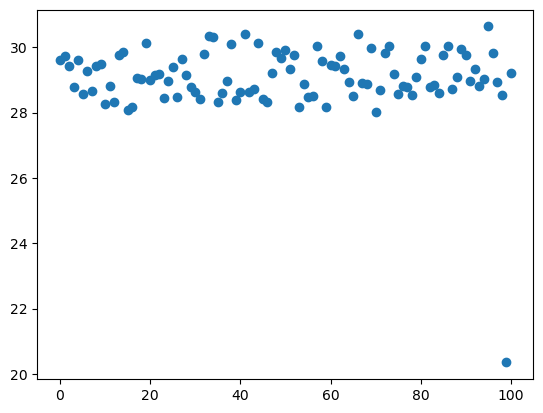

In [135]:
plt.scatter(np.arange(Nx),sx)

In [108]:
sample = parses("""p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3""")

In [10]:
sample

[[0, 4, 3, -3],
 [6, 3, -1, -3],
 [10, 3, -1, 2],
 [2, 0, 2, -1],
 [0, 0, 1, 3],
 [3, 0, -2, -2],
 [7, 6, -1, -3],
 [3, 0, -1, -2],
 [9, 3, 2, 3],
 [7, 3, -1, 2],
 [2, 4, 2, -3],
 [9, 5, -3, -3]]

In [ ]:
H, W = 101, 103

In [107]:
np.array(data)

array([[ 58,  88, -38, -20],
       [ 50,  67, -42, -90],
       [ 54,  63,  60,  46],
       ...,
       [ 84,  45,  74,  65],
       [  9,   2, -11, -42],
       [ 76,  14,  25, -94]])

In [15]:
V = lambda *x: np.array([*x])

In [16]:
def robots(data):
    robots = []
    for px, py, vx, vy in data:
        robots.append((V(px,py), V(vx,vy)))
    return robots

In [17]:
rs = robots(sample)

In [26]:
import math

In [27]:
math.prod

<function math.prod(iterable, /, *, start=1)>

In [28]:
def solve_a(data, W, H):
    rs = robots(data)
    new_rs = []
    for p, v in rs:
        p = p + v * 100
        p %= V(W, H)
        new_rs.append(p)
    w, h = W//2, H//2
    
    quads = Counter()
    for x, y in new_rs:
        if x == w or y == h:
            continue
        quads[x > w,y > h] += 1
    return math.prod(quads.values())

In [32]:
rs

[(array([0, 4]), array([ 3, -3])),
 (array([6, 3]), array([-1, -3])),
 (array([10,  3]), array([-1,  2])),
 (array([2, 0]), array([ 2, -1])),
 (array([0, 0]), array([1, 3])),
 (array([3, 0]), array([-2, -2])),
 (array([7, 6]), array([-1, -3])),
 (array([3, 0]), array([-1, -2])),
 (array([9, 3]), array([2, 3])),
 (array([7, 3]), array([-1,  2])),
 (array([2, 4]), array([ 2, -3])),
 (array([9, 5]), array([-3, -3]))]

In [50]:
X = np.zeros([101,103])

In [97]:
# pos

In [56]:
pos.max(axis=0)

array([100, 102])

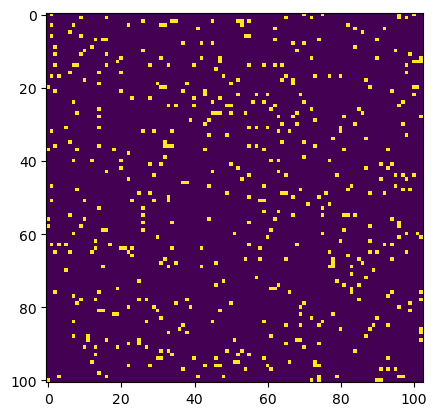

In [75]:
def render(pos, b):
    X = np.zeros([101,103])
    x, y = pos.T
    X[x,y] = 1
    plt.imshow(X)
    plt.title(b)
    plt.show()
    

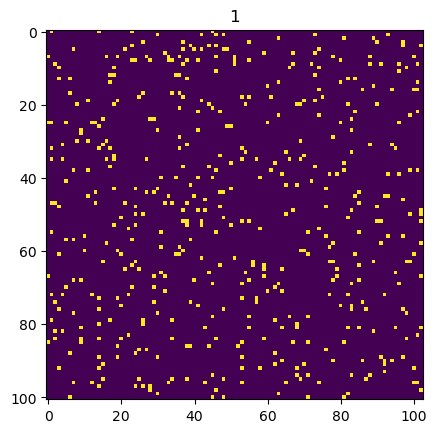

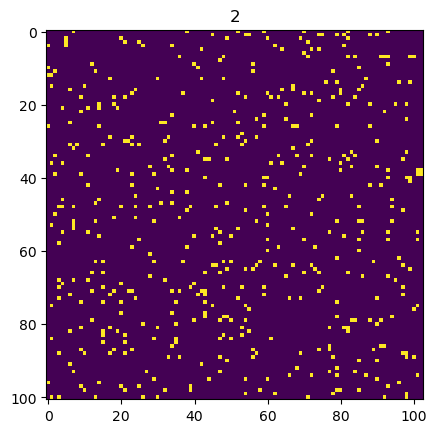

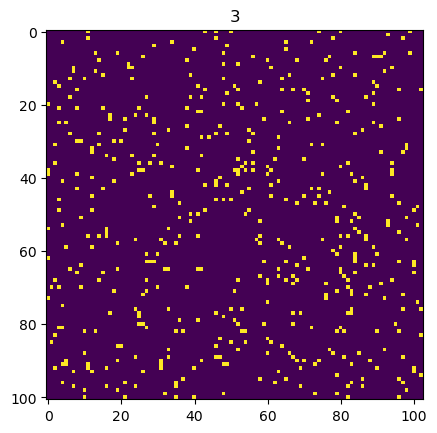

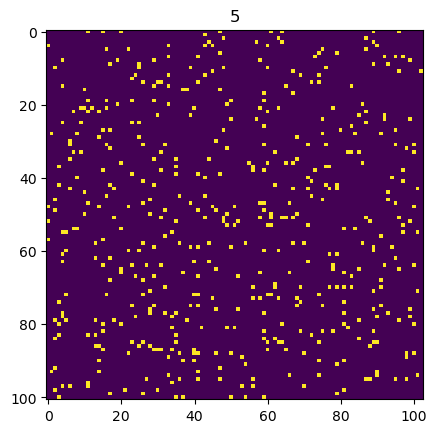

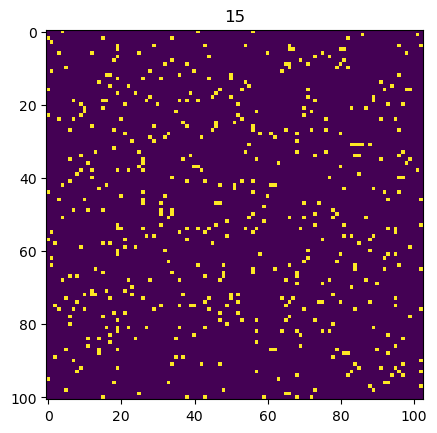

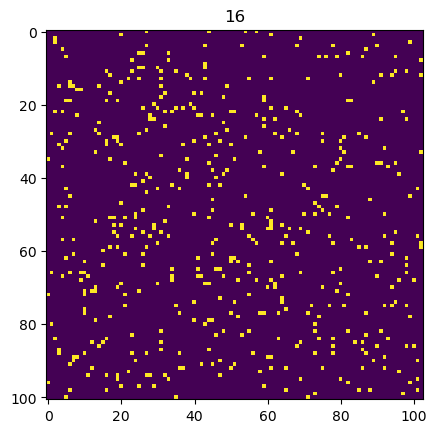

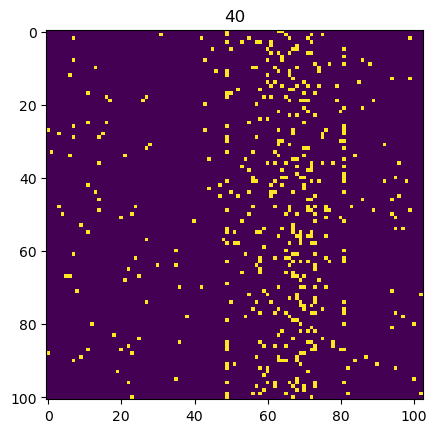

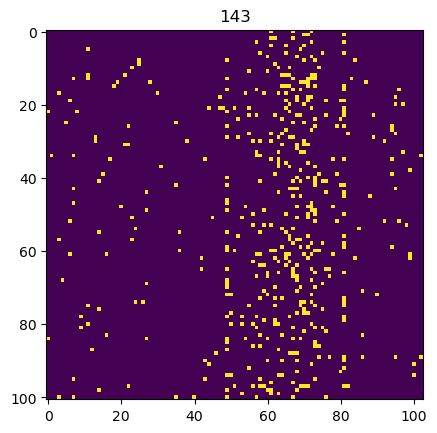

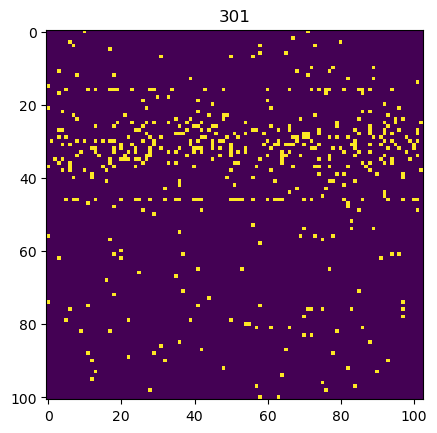

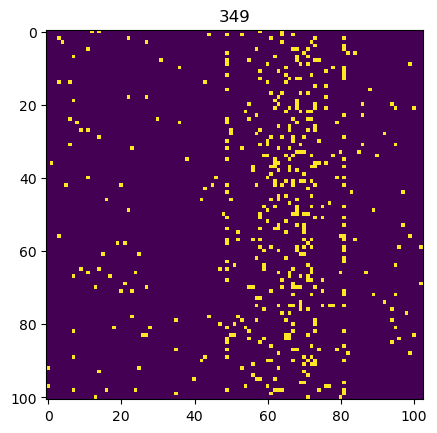

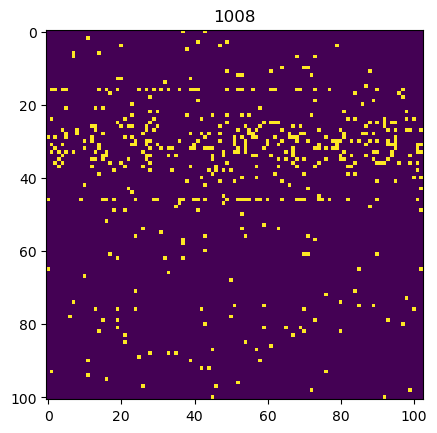

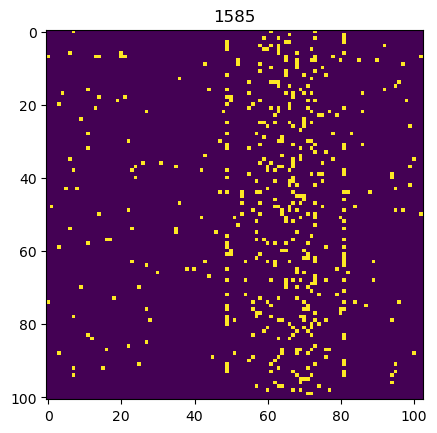

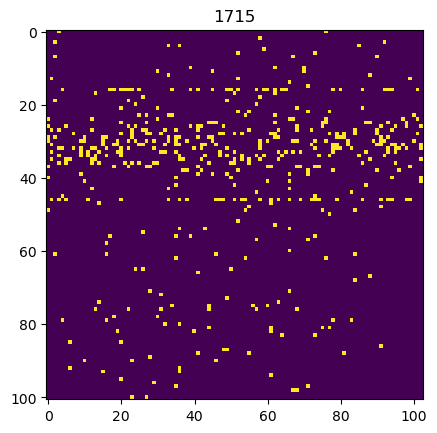

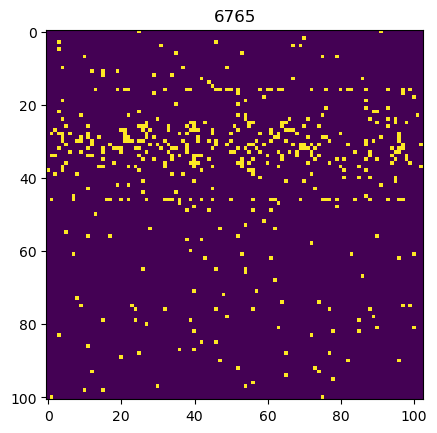

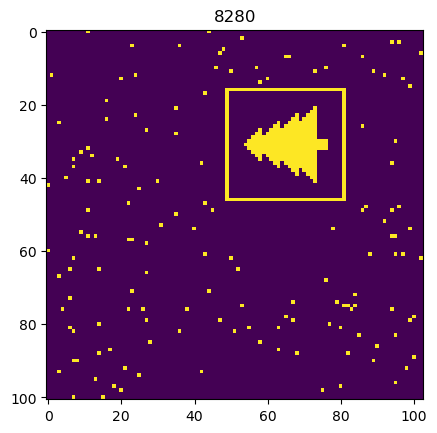

In [78]:
rs = robots(data)
pos = np.stack([p for p,v in rs])
v = np.stack([v for p,v in rs])

b = 0
mins = float('inf')
for n in range(1,100000):
    pos = (pos + v) % np.array([101,103])
    s = pos.std(axis=0).sum()
    if s < mins:
        b = n
        mins = s
#     if n % 10000:
#         print(b)
#     vari.append()
        render(pos, n)
    

In [82]:
pos
m = pos.mean(axis=0)
np.linalg.norm(pos-m, axis=1).std()

15.09307312919223

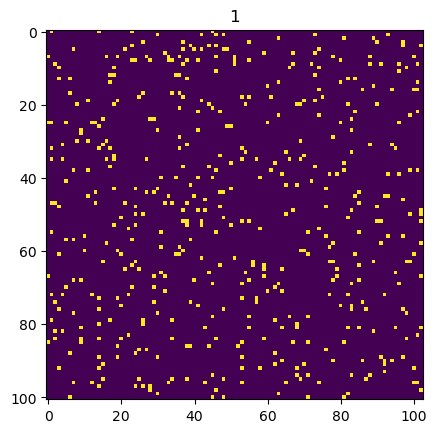

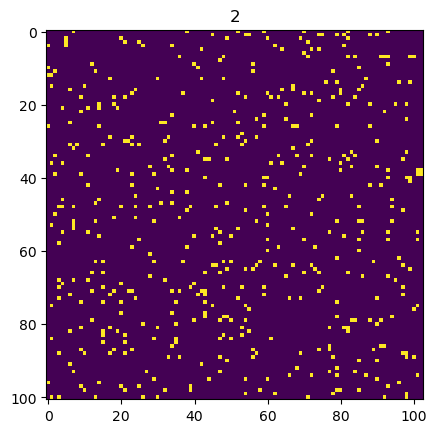

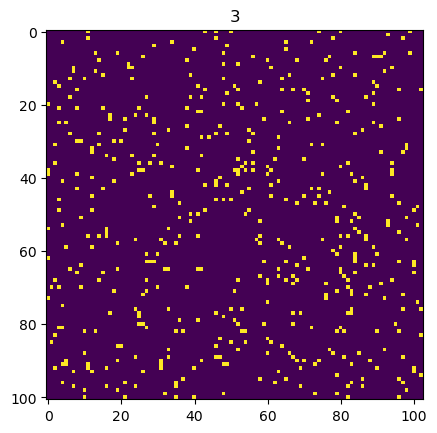

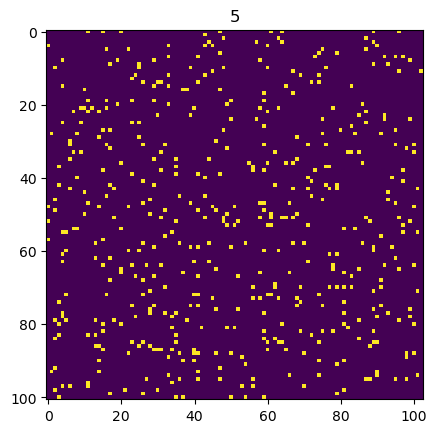

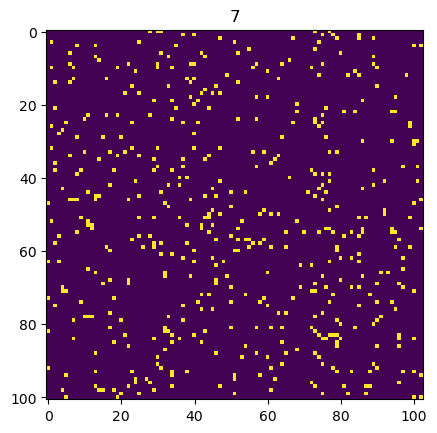

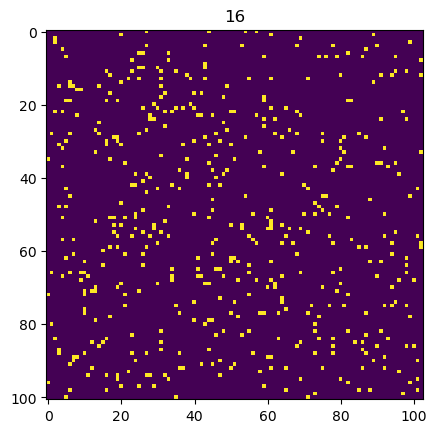

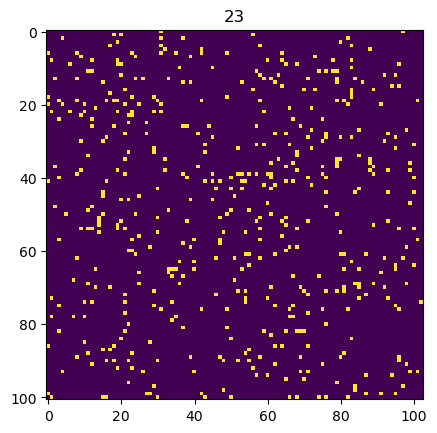

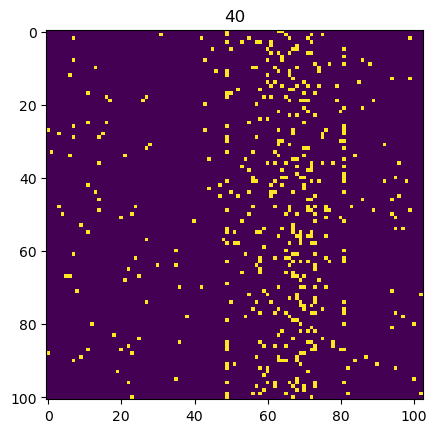

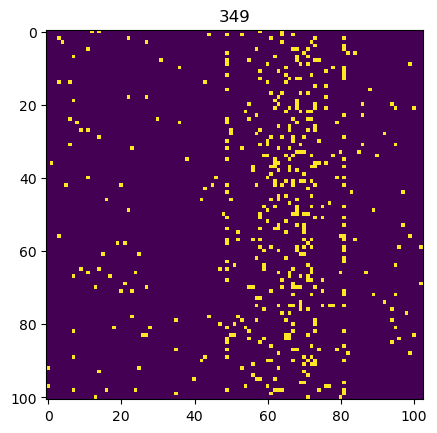

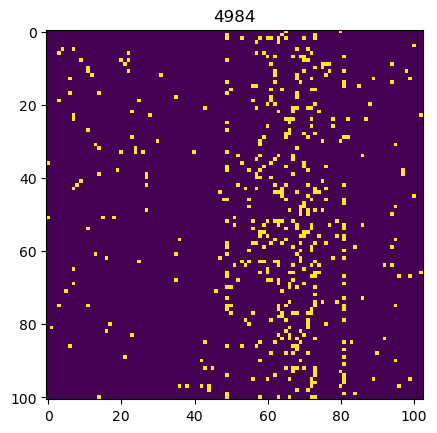

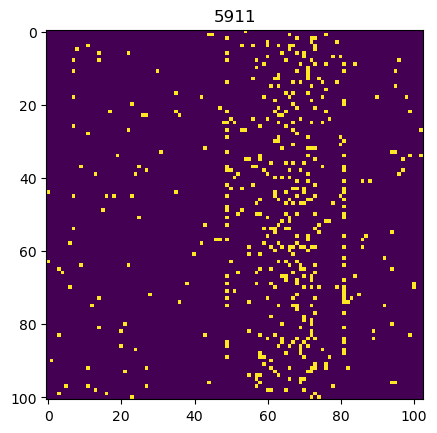

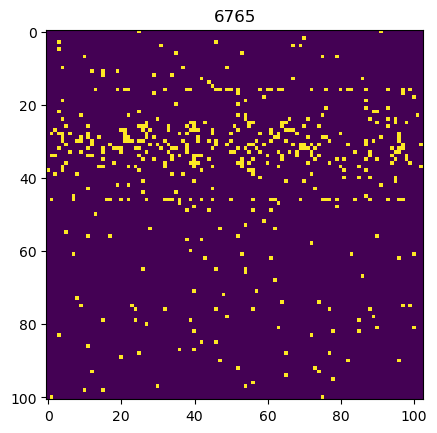

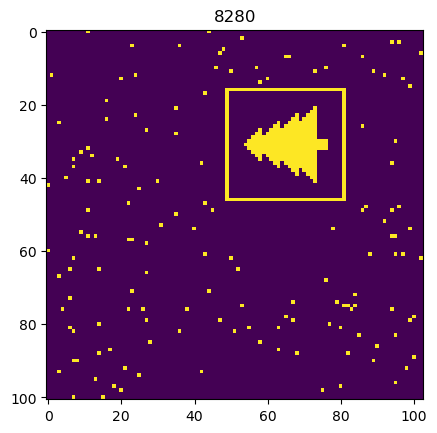

In [84]:
w

In [ ]:
rs = robots(data)
pos = np.stack([p for p,v in rs])
v = np.stack([v for p,v in rs])

b = 0
mins = float('inf')
for n in range(1,100000):
    pos = (pos + v) % np.array([101,103])
    m = pos.mean(axis=0)
#     s = np.linalg.norm(m-)
    s = np.linalg.norm(pos-m, axis=1).sum()
#     s = pos.std(axis=0).sum()
    if s < mins:
        b = n
        mins = s
#     if n % 10000:
#         print(b)
#     vari.append()
        render(pos, n)
    

In [93]:
rs = robots(data)
pos = np.stack([p for p,v in rs])
v = np.stack([v for p,v in rs])

from scipy.signal import convolve2d

when = 0
max_neighs = 0
for t in range(1, 10_000):
    pos = (pos + v) % np.array([101,103])
    seen = set([(x,y) for x, y in pos])
    neighs = 0
    for x, y in seen:
        for dx, dy in [(0,1),(0,-1),(-1,0),(1,0)]:
            neighs += ((x+dx), (y+dy)) in seen
    if neighs > max_neighs:
        max_neighs, when = neighs, t
        print(neighs, when)

80 0
88 1
102 2
116 3
188 6
210 40
222 99
232 402
238 1311
252 1715
262 2018
1062 3230


In [94]:
from scipy.signal import co

8280

In [95]:
pos

array([[ 58,  31],
       [ 50,  68],
       [ 54,  19],
       [ 56,  75],
       [ 23,   1],
       [ 28,  13],
       [ 26,  28],
       [ 38,  71],
       [ 80,  51],
       [ 13,  30],
       [  7,   9],
       [ 61,  54],
       [ 72,  44],
       [ 96,   0],
       [ 68,  73],
       [ 65,  79],
       [ 48,  21],
       [ 69,  85],
       [ 97,  85],
       [ 10,  66],
       [ 40,  41],
       [ 48,  30],
       [ 57,   5],
       [  2,  20],
       [ 28,  96],
       [ 92,  48],
       [ 67,  70],
       [ 47,  27],
       [ 33,  69],
       [ 39,  91],
       [ 81,  21],
       [ 69,   7],
       [ 58,  27],
       [ 31,  79],
       [ 73,  37],
       [ 83,  62],
       [ 64,  51],
       [ 14,  32],
       [ 91,  96],
       [ 11,  83],
       [ 80,   3],
       [ 24,   7],
       [ 55,  80],
       [ 70,  96],
       [ 97,  92],
       [ 51,  34],
       [ 88,  38],
       [ 60,  57],
       [ 45,  73],
       [ 53,  35],
       [ 65,  52],
       [ 22,  42],
       [ 82,

In [96]:
data

[[58, 88, -38, -20],
 [50, 67, -42, -90],
 [54, 63, 60, 46],
 [56, 0, 20, 48],
 [23, 40, -80, -95],
 [28, 102, 1, 79],
 [26, 72, -96, 46],
 [38, 22, -90, 19],
 [80, 29, 38, 80],
 [13, 47, -67, -15],
 [7, 74, 62, -21],
 [61, 102, 65, -6],
 [72, 57, -56, 37],
 [96, 60, -61, 44],
 [68, 31, 20, -72],
 [65, 6, -41, 22],
 [48, 8, -43, 66],
 [69, 15, -31, -17],
 [97, 37, 85, 6],
 [10, 26, 49, 5],
 [40, 7, -89, -73],
 [48, 99, 31, -73],
 [57, 34, 64, 35],
 [2, 34, 90, 24],
 [28, 81, -95, 92],
 [92, 84, 5, 47],
 [67, 32, -29, -21],
 [47, 83, -4, 96],
 [33, 98, 44, -68],
 [39, 70, -93, 67],
 [81, 14, 29, 91],
 [69, 42, -72, -43],
 [58, 96, 6, -73],
 [31, 60, -17, 41],
 [73, 79, -22, 72],
 [83, 72, 18, -27],
 [64, 21, -84, 81],
 [14, 2, 35, -22],
 [91, 27, 5, 73],
 [11, 9, 94, -68],
 [80, 96, 82, 27],
 [24, 97, 47, -37],
 [55, 84, -89, 51],
 [70, 89, 90, 91],
 [97, 93, 18, 90],
 [51, 1, -39, -86],
 [88, 61, 74, -93],
 [60, 51, 20, -25],
 [45, 22, -36, 45],
 [53, 75, 7, -5],
 [65, 98, 60, -83],
 [

In [85]:
pos.shape

(500, 2)

In [88]:
(pos[...,None] + np.array([[1,0],[-1,0],[0,1],[0,-1]]).T).shape

(500, 2, 4)

In [30]:
solve_a(data, 101, 103)

231019008

In [20]:
5//2

2

In [ ]:
def solve_a(data):
    pass

In [ ]:
solve_a(sample)

In [ ]:
solve_a(data)

In [ ]:
def solve_b(data):
    pass

In [ ]:
solve_b(sample)

In [ ]:
solve_b(data)